<a href="https://colab.research.google.com/github/maxrinal/nlp-disaster/blob/master/TP2_CODES/Rinaldi_91825/NAIVE_BAYES_LAPLACIAN_SMOOTHING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalo bibliotecas


In [ ]:
%%capture

# pip3 install -U instala un paquete en la carpeta de usuario y actualiza cuando ya existe
# ! pip3 install textblob
# ! pip3 install matplotlib
# ! pip3 install wordcloud
# ! pip3 install ipython-autotime
# ! pip3 install pandas
# ! pip3 install nltk
# ! python3 -m textblob.download_corpora

time: 262 µs


In [ ]:
%%capture


# from textblob import TextBlob

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import numpy,math
# from wordcloud import wordcloud, ImageColorGenerator
from wordcloud import WordCloud
import string,re
# Para hacer decode de las url
import urllib.parse
# Para limpiar html entities
import html

# Importo nltk para lematizar
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()


# Para utilizar multi core
from multiprocessing import  Pool

import multiprocessing

n_cores = multiprocessing.cpu_count()
from sklearn.model_selection import train_test_split



%load_ext autotime


time: 2.83 ms


In [ ]:
# Importo el listado de stopwords de english ntlk
# https://www.tutorialspoint.com/python_text_processing/python_remove_stopwords.htm
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words=[]

# Obtengo un "list" de las stop_words más comunes del idioma ingles
english_stop_words = stopwords.words('english')
spanish_stop_words = stopwords.words('spanish')


stop_words += english_stop_words
stop_words += spanish_stop_words
stop_words += ['']
# english_stop_words.append(spanish_stop_words)
# Agrego a la lista de remover la palabra vacia
# english_stop_words.append('')


# print( "Cantidad de palabras " + str(len(english_stop_words)) + "\n" , english_stop_words[10:20] )

# type(stop_words)

time: 4.59 ms


# Importo el dataset

In [ ]:
# csv_charset = 'latin1'
csv_charset = 'utf-8'

train = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/train.csv' )
test = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/test.csv' )


pd_cv_test_id = pd.read_csv('SET/set_validation_id.csv')

# # Tomo el dataframe original
# df_clean_train = train.copy()
# df_clean_test  = test.copy()

list_cv_test_id = pd_cv_test_id.id.to_list()

len( list_cv_test_id)

1523

time: 976 ms


In [ ]:
# Usando un una lista de id común a todo el grupo generarenmos un set para crossvalidation que nos permita generar un ensamble
df_clean_train = train[ ~train.id.isin(list_cv_test_id) ].copy()
df_clean_test = train[  train.id.isin(list_cv_test_id) ].copy()


# df_clean_train = train.copy()
# df_clean_test = test.copy()

print( len(train) , len(df_clean_train) , len(df_clean_test) ) 

7613 6090 1523
time: 8.06 ms


# Limpieza del texto

In [ ]:
def super_manual_clean(tweet): 
            
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    
    # Hashtags and usernames
    tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
    tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
    tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
    tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
    tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
    tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
    tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
    tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
    tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
    tweet = re.sub(r"socialnews", "social news", tweet)
    tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
    tweet = re.sub(r"onlinecommunities", "online communities", tweet)
    tweet = re.sub(r"humanconsumption", "human consumption", tweet)
    tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
    tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
    tweet = re.sub(r"facialabuse", "facial abuse", tweet)
    tweet = re.sub(r"LakeCounty", "Lake County", tweet)
    tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
    tweet = re.sub(r"withheavenly", "with heavenly", tweet)
    tweet = re.sub(r"thankU", "thank you", tweet)
    tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
    tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
    tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
    tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
    tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
    tweet = re.sub(r"animalrescue", "animal rescue", tweet)
    tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
    tweet = re.sub(r"aRmageddon", "armageddon", tweet)
    tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
    tweet = re.sub(r"GodsLove", "God's Love", tweet)
    tweet = re.sub(r"bookboost", "book boost", tweet)
    tweet = re.sub(r"ibooklove", "I book love", tweet)
    tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
    tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
    tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
    tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
    tweet = re.sub(r"weathernetwork", "weather network", tweet)
    tweet = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", tweet)
    tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
    tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
    tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
    tweet = re.sub(r"frontpage", "front page", tweet)
    tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
    tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
    tweet = re.sub(r"til_now", "until now", tweet)
    tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
    tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
    tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
    tweet = re.sub(r"53inch", "53 inch", tweet)
    tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
    tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
    tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
    tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
    tweet = re.sub(r"DETECTADO", "Detected", tweet)
    tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
    tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
    tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
    tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
    tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
    tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
    tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
    tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
    tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
    tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
    tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
    tweet = re.sub(r"Time2015", "Time 2015", tweet)
    tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
    tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
    tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
    tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
    tweet = re.sub(r"bbcnews", "bbc news", tweet)
    tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
    tweet = re.sub(r"c4news", "c4 news", tweet)
    tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
    tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
    tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
    tweet = re.sub(r"NotExplained", "Not Explained", tweet)
    tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
    tweet = re.sub(r"LondonFire", "London Fire", tweet)
    tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
    tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
    tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
    tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
    tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
    tweet = re.sub(r"nikeplus", "nike plus", tweet)
    tweet = re.sub(r"david_cameron", "David Cameron", tweet)
    tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
    tweet = re.sub(r"JamesMelville", "James Melville", tweet)
    tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
    tweet = re.sub(r"cnewslive", "C News Live", tweet)
    tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
    tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
    tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
    tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
    tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
    tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
    tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
    tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
    tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
    tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
    tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
    tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
    tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
    tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
    tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
    tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
    tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
    tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
    tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
    tweet = re.sub(r"GRupdates", "GR updates", tweet)
    tweet = re.sub(r"SouthDowns", "South Downs", tweet)
    tweet = re.sub(r"braininjury", "brain injury", tweet)
    tweet = re.sub(r"auspol", "Australian politics", tweet)
    tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
    tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
    tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
    tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
    tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
    tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
    tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
    tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
    tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
    tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
    tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
    tweet = re.sub(r"offers2go", "offers to go", tweet)
    tweet = re.sub(r"foodscare", "food scare", tweet)
    tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
    tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
    tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
    tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
    tweet = re.sub(r"spinningbot", "spinning bot", tweet)
    tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
    tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
    tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
    tweet = re.sub(r"po_st", "po.st", tweet)
    tweet = re.sub(r"scoopit", "scoop.it", tweet)
    tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
    tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
    tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
    tweet = re.sub(r"rapidcity", "Rapid City", tweet)
    tweet = re.sub(r"OutBid", "outbid", tweet)
    tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
    tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
    tweet = re.sub(r"15PM", "15 PM", tweet)
    tweet = re.sub(r"OriginalFunko", "Funko", tweet)
    tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
    tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
    tweet = re.sub(r"RT_America", "RT America", tweet)
    tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
    tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
    tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
    tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
    tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
    tweet = re.sub(r"gunsense", "gun sense", tweet)
    tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
    tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
    tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
    tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
    tweet = re.sub(r"renew911health", "renew 911 health", tweet)
    tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
    tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
    tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
    tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
    tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
    tweet = re.sub(r"pdx911", "Portland Police", tweet)
    tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
    tweet = re.sub(r"Japton", "Arkansas", tweet)
    tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
    tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
    tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
    tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
    tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
    tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
    tweet = re.sub(r"versethe", "verse the", tweet)
    tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
    tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
    tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
    tweet = re.sub(r"NANKANA", "Nankana", tweet)
    tweet = re.sub(r"SAHIB", "Sahib", tweet)
    tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
    tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
    tweet = re.sub(r"gofundme", "go fund me", tweet)
    tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
    tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
    tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
    tweet = re.sub(r"bancodeseries", "banco de series", tweet)
    tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
    tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
    tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
    tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
    tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
    tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
    tweet = re.sub(r"Kowing", "Knowing", tweet)
    tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
    tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
    tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
    tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
    tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
    tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
    tweet = re.sub(r"Ptbo", "Peterborough", tweet)
    tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
    tweet = re.sub(r"IndianNews", "Indian News", tweet)
    tweet = re.sub(r"savebees", "save bees", tweet)
    tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
    tweet = re.sub(r"StandwithPP", "Stand with planned parenthood", tweet)
    tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
    tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
    tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
    tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
    tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
    tweet = re.sub(r"Daesh", "ISIS", tweet)
    tweet = re.sub(r"s2g", "swear to god", tweet)
    tweet = re.sub(r"listenlive", "listen live", tweet)
    tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
    tweet = re.sub(r"FoxNew", "Fox News", tweet)
    tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
    tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
    tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
    tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
    tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
    tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
    tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
    tweet = re.sub(r"HORNDALE", "Horndale", tweet)
    tweet = re.sub(r"PINER", "Piner", tweet)
    tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
    tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
    tweet = re.sub(r"residualincome", "residual income", tweet)
    tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
    tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
    tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
    tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
    tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
    tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
    tweet = re.sub(r"pop2015", "pop 2015", tweet)
    tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
    tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
    tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
    tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
    tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
    tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
    tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
    tweet = re.sub(r"EndConflict", "End Conflict", tweet)
    tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
    tweet = re.sub(r"UNHEALED", "unhealed", tweet)
    tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
    tweet = re.sub(r"Latestnews", "Latest news", tweet)
    tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
    tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
    tweet = re.sub(r"datingtips", "dating tips", tweet)
    tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
    tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
    tweet = re.sub(r"txlege", "Texas Legislature", tweet)
    tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
    tweet = re.sub(r"Newss", "News", tweet)
    tweet = re.sub(r"hempoil", "hemp oil", tweet)
    tweet = re.sub(r"CommoditiesAre", "Commodities are", tweet)
    tweet = re.sub(r"tubestrike", "tube strike", tweet)
    tweet = re.sub(r"JoeNBC", "Joe Scarborough", tweet)
    tweet = re.sub(r"LiteraryCakes", "Literary Cakes", tweet)
    tweet = re.sub(r"TI5", "The International 5", tweet)
    tweet = re.sub(r"thehill", "the hill", tweet)
    tweet = re.sub(r"3others", "3 others", tweet)
    tweet = re.sub(r"stighefootball", "Sam Tighe", tweet)
    tweet = re.sub(r"whatstheimportantvideo", "what is the important video", tweet)
    tweet = re.sub(r"ClaudioMeloni", "Claudio Meloni", tweet)
    tweet = re.sub(r"DukeSkywalker", "Duke Skywalker", tweet)
    tweet = re.sub(r"carsonmwr", "Fort Carson", tweet)
    tweet = re.sub(r"offdishduty", "off dish duty", tweet)
    tweet = re.sub(r"andword", "and word", tweet)
    tweet = re.sub(r"rhodeisland", "Rhode Island", tweet)
    tweet = re.sub(r"easternoregon", "Eastern Oregon", tweet)
    tweet = re.sub(r"WAwildfire", "Washington Wildfire", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"57am", "57 am", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"JacobHoggard", "Jacob Hoggard", tweet)
    tweet = re.sub(r"newnewnew", "new new new", tweet)
    tweet = re.sub(r"under50", "under 50", tweet)
    tweet = re.sub(r"getitbeforeitsgone", "get it before it is gone", tweet)
    tweet = re.sub(r"freshoutofthebox", "fresh out of the box", tweet)
    tweet = re.sub(r"amwriting", "am writing", tweet)
    tweet = re.sub(r"Bokoharm", "Boko Haram", tweet)
    tweet = re.sub(r"Nowlike", "Now like", tweet)
    tweet = re.sub(r"seasonfrom", "season from", tweet)
    tweet = re.sub(r"epicente", "epicenter", tweet)
    tweet = re.sub(r"epicenterr", "epicenter", tweet)
    tweet = re.sub(r"sicklife", "sick life", tweet)
    tweet = re.sub(r"yycweather", "Calgary Weather", tweet)
    tweet = re.sub(r"calgarysun", "Calgary Sun", tweet)
    tweet = re.sub(r"approachng", "approaching", tweet)
    tweet = re.sub(r"evng", "evening", tweet)
    tweet = re.sub(r"Sumthng", "something", tweet)
    tweet = re.sub(r"EllenPompeo", "Ellen Pompeo", tweet)
    tweet = re.sub(r"shondarhimes", "Shonda Rhimes", tweet)
    tweet = re.sub(r"ABCNetwork", "ABC Network", tweet)
    tweet = re.sub(r"SushmaSwaraj", "Sushma Swaraj", tweet)
    tweet = re.sub(r"pray4japan", "Pray for Japan", tweet)
    tweet = re.sub(r"hope4japan", "Hope for Japan", tweet)
    tweet = re.sub(r"Illusionimagess", "Illusion images", tweet)
    tweet = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", tweet)
    tweet = re.sub(r"ShallWeDance", "Shall We Dance", tweet)
    tweet = re.sub(r"TCMParty", "TCM Party", tweet)
    tweet = re.sub(r"marijuananews", "marijuana news", tweet)
    tweet = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", tweet)
    tweet = re.sub(r"Beingtweets", "Being tweets", tweet)
    tweet = re.sub(r"newauthors", "new authors", tweet)
    tweet = re.sub(r"remedyyyy", "remedy", tweet)
    tweet = re.sub(r"44PM", "44 PM", tweet)
    tweet = re.sub(r"HeadlinesApp", "Headlines App", tweet)
    tweet = re.sub(r"40PM", "40 PM", tweet)
    tweet = re.sub(r"myswc", "Severe Weather Center", tweet)
    tweet = re.sub(r"ithats", "that is", tweet)
    tweet = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", tweet)
    tweet = re.sub(r"FatLoss", "Fat Loss", tweet)
    tweet = re.sub(r"02PM", "02 PM", tweet)
    tweet = re.sub(r"MetroFmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"Bstrd", "bastard", tweet)
    tweet = re.sub(r"bldy", "bloody", tweet)
    tweet = re.sub(r"MetrofmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"terrorismturn", "terrorism turn", tweet)
    tweet = re.sub(r"BBCNewsAsia", "BBC News Asia", tweet)
    tweet = re.sub(r"BehindTheScenes", "Behind The Scenes", tweet)
    tweet = re.sub(r"GeorgeTakei", "George Takei", tweet)
    tweet = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", tweet)
    tweet = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", tweet)
    tweet = re.sub(r"incubusband", "incubus band", tweet)
    tweet = re.sub(r"Babypicturethis", "Baby picture this", tweet)
    tweet = re.sub(r"BombEffects", "Bomb Effects", tweet)
    tweet = re.sub(r"win10", "Windows 10", tweet)
    tweet = re.sub(r"idkidk", "I do not know I do not know", tweet)
    tweet = re.sub(r"TheWalkingDead", "The Walking Dead", tweet)
    tweet = re.sub(r"amyschumer", "Amy Schumer", tweet)
    tweet = re.sub(r"crewlist", "crew list", tweet)
    tweet = re.sub(r"Erdogans", "Erdogan", tweet)
    tweet = re.sub(r"BBCLive", "BBC Live", tweet)
    tweet = re.sub(r"TonyAbbottMHR", "Tony Abbott", tweet)
    tweet = re.sub(r"paulmyerscough", "Paul Myerscough", tweet)
    tweet = re.sub(r"georgegallagher", "George Gallagher", tweet)
    tweet = re.sub(r"JimmieJohnson", "Jimmie Johnson", tweet)
    tweet = re.sub(r"pctool", "pc tool", tweet)
    tweet = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", tweet)
    tweet = re.sub(r"ThrowbackThursday", "Throwback Thursday", tweet)
    tweet = re.sub(r"SnowBackSunday", "Snowback Sunday", tweet)
    tweet = re.sub(r"LakeEffect", "Lake Effect", tweet)
    tweet = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", tweet)
    tweet = re.sub(r"BigBang_CBS", "Big Bang CBS", tweet)
    tweet = re.sub(r"writerslife", "writers life", tweet)
    tweet = re.sub(r"NaturalBirth", "Natural Birth", tweet)
    tweet = re.sub(r"UnusualWords", "Unusual Words", tweet)
    tweet = re.sub(r"wizkhalifa", "Wiz Khalifa", tweet)
    tweet = re.sub(r"acreativedc", "a creative DC", tweet)
    tweet = re.sub(r"vscodc", "vsco DC", tweet)
    tweet = re.sub(r"VSCOcam", "vsco camera", tweet)
    tweet = re.sub(r"TheBEACHDC", "The beach DC", tweet)
    tweet = re.sub(r"buildingmuseum", "building museum", tweet)
    tweet = re.sub(r"WorldOil", "World Oil", tweet)
    tweet = re.sub(r"redwedding", "red wedding", tweet)
    tweet = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", tweet)
    tweet = re.sub(r"WakeUpAmerica", "Wake Up America", tweet)
    tweet = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", tweet)
    tweet = re.sub(r"bleased", "blessed", tweet)
    tweet = re.sub(r"nigeriantribune", "Nigerian Tribune", tweet)
    tweet = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", tweet)
    tweet = re.sub(r"FusionFestival", "Fusion Festival", tweet)
    tweet = re.sub(r"50Mixed", "50 Mixed", tweet)
    tweet = re.sub(r"NoAgenda", "No Agenda", tweet)
    tweet = re.sub(r"WhiteGenocide", "White Genocide", tweet)
    tweet = re.sub(r"dirtylying", "dirty lying", tweet)
    tweet = re.sub(r"SyrianRefugees", "Syrian Refugees", tweet)
    tweet = re.sub(r"changetheworld", "change the world", tweet)
    tweet = re.sub(r"Ebolacase", "Ebola case", tweet)
    tweet = re.sub(r"mcgtech", "mcg technologies", tweet)
    tweet = re.sub(r"withweapons", "with weapons", tweet)
    tweet = re.sub(r"advancedwarfare", "advanced warfare", tweet)
    tweet = re.sub(r"letsFootball", "let us Football", tweet)
    tweet = re.sub(r"LateNiteMix", "late night mix", tweet)
    tweet = re.sub(r"PhilCollinsFeed", "Phil Collins", tweet)
    tweet = re.sub(r"RudyHavenstein", "Rudy Havenstein", tweet)
    tweet = re.sub(r"22PM", "22 PM", tweet)
    tweet = re.sub(r"54am", "54 AM", tweet)
    tweet = re.sub(r"38am", "38 AM", tweet)
    tweet = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", tweet)
    tweet = re.sub(r"BlacklivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"InsaneLimits", "Insane Limits", tweet)
    tweet = re.sub(r"youcantsitwithus", "you cannot sit with us", tweet)
    tweet = re.sub(r"2k15", "2015", tweet)
    tweet = re.sub(r"TheIran", "Iran", tweet)
    tweet = re.sub(r"JimmyFallon", "Jimmy Fallon", tweet)
    tweet = re.sub(r"AlbertBrooks", "Albert Brooks", tweet)
    tweet = re.sub(r"defense_news", "defense news", tweet)
    tweet = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", tweet)
    tweet = re.sub(r"Auspol", "Australia Politics", tweet)
    tweet = re.sub(r"NuclearPower", "Nuclear Power", tweet)
    tweet = re.sub(r"WhiteTerrorism", "White Terrorism", tweet)
    tweet = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", tweet)
    tweet = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", tweet)
    tweet = re.sub(r"ProBonoNews", "Pro Bono News", tweet)
    tweet = re.sub(r"JakartaPost", "Jakarta Post", tweet)
    tweet = re.sub(r"toopainful", "too painful", tweet)
    tweet = re.sub(r"melindahaunton", "Melinda Haunton", tweet)
    tweet = re.sub(r"NoNukes", "No Nukes", tweet)
    tweet = re.sub(r"curryspcworld", "Currys PC World", tweet)
    tweet = re.sub(r"ineedcake", "I need cake", tweet)
    tweet = re.sub(r"blackforestgateau", "black forest gateau", tweet)
    tweet = re.sub(r"BBCOne", "BBC One", tweet)
    tweet = re.sub(r"AlexxPage", "Alex Page", tweet)
    tweet = re.sub(r"jonathanserrie", "Jonathan Serrie", tweet)
    tweet = re.sub(r"SocialJerkBlog", "Social Jerk Blog", tweet)
    tweet = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", tweet)
    tweet = re.sub(r"irongiant", "iron giant", tweet)
    tweet = re.sub(r"RonFunches", "Ron Funches", tweet)
    tweet = re.sub(r"TimCook", "Tim Cook", tweet)
    tweet = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", tweet)
    tweet = re.sub(r"Madsummer", "Mad summer", tweet)
    tweet = re.sub(r"NowYouKnow", "Now you know", tweet)
    tweet = re.sub(r"concertphotography", "concert photography", tweet)
    tweet = re.sub(r"TomLandry", "Tom Landry", tweet)
    tweet = re.sub(r"showgirldayoff", "show girl day off", tweet)
    tweet = re.sub(r"Yougslavia", "Yugoslavia", tweet)
    tweet = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", tweet)
    tweet = re.sub(r"FromTheDesk", "From The Desk", tweet)
    tweet = re.sub(r"TheaterTrial", "Theater Trial", tweet)
    tweet = re.sub(r"CatoInstitute", "Cato Institute", tweet)
    tweet = re.sub(r"EmekaGift", "Emeka Gift", tweet)
    tweet = re.sub(r"LetsBe_Rational", "Let us be rational", tweet)
    tweet = re.sub(r"Cynicalreality", "Cynical reality", tweet)
    tweet = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", tweet)
    tweet = re.sub(r"NotSorry", "not sorry", tweet)
    tweet = re.sub(r"UseYourWords", "use your words", tweet)
    tweet = re.sub(r"WordoftheDay", "word of the day", tweet)
    tweet = re.sub(r"Dictionarycom", "Dictionary.com", tweet)
    tweet = re.sub(r"TheBrooklynLife", "The Brooklyn Life", tweet)
    tweet = re.sub(r"jokethey", "joke they", tweet)
    tweet = re.sub(r"nflweek1picks", "NFL week 1 picks", tweet)
    tweet = re.sub(r"uiseful", "useful", tweet)
    tweet = re.sub(r"JusticeDotOrg", "The American Association for Justice", tweet)
    tweet = re.sub(r"autoaccidents", "auto accidents", tweet)
    tweet = re.sub(r"SteveGursten", "Steve Gursten", tweet)
    tweet = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", tweet)
    tweet = re.sub(r"birdgang", "bird gang", tweet)
    tweet = re.sub(r"nflnetwork", "NFL Network", tweet)
    tweet = re.sub(r"NYDNSports", "NY Daily News Sports", tweet)
    tweet = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", tweet)
    tweet = re.sub(r"EdmontonEsks", "Edmonton Eskimos", tweet)
    tweet = re.sub(r"david_brelsford", "David Brelsford", tweet)
    tweet = re.sub(r"TOI_India", "The Times of India", tweet)
    tweet = re.sub(r"hegot", "he got", tweet)
    tweet = re.sub(r"SkinsOn9", "Skins on 9", tweet)
    tweet = re.sub(r"sothathappened", "so that happened", tweet)
    tweet = re.sub(r"LCOutOfDoors", "LC Out Of Doors", tweet)
    tweet = re.sub(r"NationFirst", "Nation First", tweet)
    tweet = re.sub(r"IndiaToday", "India Today", tweet)
    tweet = re.sub(r"HLPS", "helps", tweet)
    tweet = re.sub(r"HOSTAGESTHROSW", "hostages throw", tweet)
    tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
    tweet = re.sub(r"BidTime", "Bid Time", tweet)
    tweet = re.sub(r"crunchysensible", "crunchy sensible", tweet)
    tweet = re.sub(r"RandomActsOfRomance", "Random acts of romance", tweet)
    tweet = re.sub(r"MomentsAtHill", "Moments at hill", tweet)
    tweet = re.sub(r"eatshit", "eat shit", tweet)
    tweet = re.sub(r"liveleakfun", "live leak fun", tweet)
    tweet = re.sub(r"SahelNews", "Sahel News", tweet)
    tweet = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", tweet)
    tweet = re.sub(r"facilitiesmanagement", "facilities management", tweet)
    tweet = re.sub(r"facilitydude", "facility dude", tweet)
    tweet = re.sub(r"CampLogistics", "Camp logistics", tweet)
    tweet = re.sub(r"alaskapublic", "Alaska public", tweet)
    tweet = re.sub(r"MarketResearch", "Market Research", tweet)
    tweet = re.sub(r"AccuracyEsports", "Accuracy Esports", tweet)
    tweet = re.sub(r"TheBodyShopAust", "The Body Shop Australia", tweet)
    tweet = re.sub(r"yychail", "Calgary hail", tweet)
    tweet = re.sub(r"yyctraffic", "Calgary traffic", tweet)
    tweet = re.sub(r"eliotschool", "eliot school", tweet)
    tweet = re.sub(r"TheBrokenCity", "The Broken City", tweet)
    tweet = re.sub(r"OldsFireDept", "Olds Fire Department", tweet)
    tweet = re.sub(r"RiverComplex", "River Complex", tweet)
    tweet = re.sub(r"fieldworksmells", "field work smells", tweet)
    tweet = re.sub(r"IranElection", "Iran Election", tweet)
    tweet = re.sub(r"glowng", "glowing", tweet)
    tweet = re.sub(r"kindlng", "kindling", tweet)
    tweet = re.sub(r"riggd", "rigged", tweet)
    tweet = re.sub(r"slownewsday", "slow news day", tweet)
    tweet = re.sub(r"MyanmarFlood", "Myanmar Flood", tweet)
    tweet = re.sub(r"abc7chicago", "ABC 7 Chicago", tweet)
    tweet = re.sub(r"copolitics", "Colorado Politics", tweet)
    tweet = re.sub(r"AdilGhumro", "Adil Ghumro", tweet)
    tweet = re.sub(r"netbots", "net bots", tweet)
    tweet = re.sub(r"byebyeroad", "bye bye road", tweet)
    tweet = re.sub(r"massiveflooding", "massive flooding", tweet)
    tweet = re.sub(r"EndofUS", "End of United States", tweet)
    tweet = re.sub(r"35PM", "35 PM", tweet)
    tweet = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", tweet)
    tweet = re.sub(r"76mins", "76 minutes", tweet)
    tweet = re.sub(r"publicsafetyfirst", "public safety first", tweet)
    tweet = re.sub(r"livesmatter", "lives matter", tweet)
    tweet = re.sub(r"myhometown", "my hometown", tweet)
    tweet = re.sub(r"tankerfire", "tanker fire", tweet)
    tweet = re.sub(r"MEMORIALDAY", "memorial day", tweet)
    tweet = re.sub(r"MEMORIAL_DAY", "memorial day", tweet)
    tweet = re.sub(r"instaxbooty", "instagram booty", tweet)
    tweet = re.sub(r"Jerusalem_Post", "Jerusalem Post", tweet)
    tweet = re.sub(r"WayneRooney_INA", "Wayne Rooney", tweet)
    tweet = re.sub(r"VirtualReality", "Virtual Reality", tweet)
    tweet = re.sub(r"OculusRift", "Oculus Rift", tweet)
    tweet = re.sub(r"OwenJones84", "Owen Jones", tweet)
    tweet = re.sub(r"jeremycorbyn", "Jeremy Corbyn", tweet)
    tweet = re.sub(r"paulrogers002", "Paul Rogers", tweet)
    tweet = re.sub(r"mortalkombatx", "Mortal Kombat X", tweet)
    tweet = re.sub(r"mortalkombat", "Mortal Kombat", tweet)
    tweet = re.sub(r"FilipeCoelho92", "Filipe Coelho", tweet)
    tweet = re.sub(r"OnlyQuakeNews", "Only Quake News", tweet)
    tweet = re.sub(r"kostumes", "costumes", tweet)
    tweet = re.sub(r"YEEESSSS", "yes", tweet)
    tweet = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", tweet)
    tweet = re.sub(r"IntlDevelopment", "Intl Development", tweet)
    tweet = re.sub(r"ExtremeWeather", "Extreme Weather", tweet)
    tweet = re.sub(r"WereNotGruberVoters", "We are not gruber voters", tweet)
    tweet = re.sub(r"NewsThousands", "News Thousands", tweet)
    tweet = re.sub(r"EdmundAdamus", "Edmund Adamus", tweet)
    tweet = re.sub(r"EyewitnessWV", "Eye witness WV", tweet)
    tweet = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", tweet)
    tweet = re.sub(r"DublinComicCon", "Dublin Comic Con", tweet)
    tweet = re.sub(r"NicholasBrendon", "Nicholas Brendon", tweet)
    tweet = re.sub(r"Alltheway80s", "All the way 80s", tweet)
    tweet = re.sub(r"FromTheField", "From the field", tweet)
    tweet = re.sub(r"NorthIowa", "North Iowa", tweet)
    tweet = re.sub(r"WillowFire", "Willow Fire", tweet)
    tweet = re.sub(r"MadRiverComplex", "Mad River Complex", tweet)
    tweet = re.sub(r"feelingmanly", "feeling manly", tweet)
    tweet = re.sub(r"stillnotoverit", "still not over it", tweet)
    tweet = re.sub(r"FortitudeValley", "Fortitude Valley", tweet)
    tweet = re.sub(r"CoastpowerlineTramTr", "Coast powerline", tweet)
    tweet = re.sub(r"ServicesGold", "Services Gold", tweet)
    tweet = re.sub(r"NewsbrokenEmergency", "News broken emergency", tweet)
    tweet = re.sub(r"Evaucation", "evacuation", tweet)
    tweet = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", tweet)
    tweet = re.sub(r"P_EOPLE", "PEOPLE", tweet)
    tweet = re.sub(r"Tubestrike", "tube strike", tweet)
    tweet = re.sub(r"CLASS_SICK", "CLASS SICK", tweet)
    tweet = re.sub(r"localplumber", "local plumber", tweet)
    tweet = re.sub(r"awesomejobsiri", "awesome job siri", tweet)
    tweet = re.sub(r"PayForItHow", "Pay for it how", tweet)
    tweet = re.sub(r"ThisIsAfrica", "This is Africa", tweet)
    tweet = re.sub(r"crimeairnetwork", "crime air network", tweet)
    tweet = re.sub(r"KimAcheson", "Kim Acheson", tweet)
    tweet = re.sub(r"cityofcalgary", "City of Calgary", tweet)
    tweet = re.sub(r"prosyndicate", "pro syndicate", tweet)
    tweet = re.sub(r"660NEWS", "660 NEWS", tweet)
    tweet = re.sub(r"BusInsMagazine", "Business Insurance Magazine", tweet)
    tweet = re.sub(r"wfocus", "focus", tweet)
    tweet = re.sub(r"ShastaDam", "Shasta Dam", tweet)
    tweet = re.sub(r"go2MarkFranco", "Mark Franco", tweet)
    tweet = re.sub(r"StephGHinojosa", "Steph Hinojosa", tweet)
    tweet = re.sub(r"Nashgrier", "Nash Grier", tweet)
    tweet = re.sub(r"NashNewVideo", "Nash new video", tweet)
    tweet = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", tweet)
    tweet = re.sub(r"SHGames", "Sledgehammer Games", tweet)
    tweet = re.sub(r"bedhair", "bed hair", tweet)
    tweet = re.sub(r"JoelHeyman", "Joel Heyman", tweet)
    tweet = re.sub(r"viaYouTube", "via YouTube", tweet)
           
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')      
        
    # Acronyms
    tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
    tweet = re.sub(r"mÌ¼sica", "music", tweet)
    tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
    tweet = re.sub(r"arwx", "Arkansas Weather", tweet)    
    tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
    tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
    tweet = re.sub(r"cawx", "California Weather", tweet)
    tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
    tweet = re.sub(r"azwx", "Arizona Weather", tweet)  
    tweet = re.sub(r"alwx", "Alabama Weather", tweet)
    tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)    
    tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
    tweet = re.sub(r"Suruc", "Sanliurfa", tweet)   
    
    # Grouping same words without embeddings
    tweet = re.sub(r"Bestnaijamade", "bestnaijamade", tweet)
    tweet = re.sub(r"SOUDELOR", "Soudelor", tweet)
    
    return tweet

time: 56.3 ms


## Basic Clean

In [ ]:
def clean_text(text ):
  # Si no es un string devuelvo un string vacio
  if isinstance( text , str) == False: return ''
  # text = super_manual_clean(text)
  # text = text.lower()
  # return text

  # Remuevo html entities b
  text = html.unescape( text )

  # # Hago decode de todos los textos que esten encodeados en formato url
  text = urllib.parse.unquote( text )


  # Intento remover todos los links que figuren en el texto
  text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text )

  # Remuevo todas las citas de usuario, si arranca con @ es un user quote
  # text = " ".join( [a for a in text.split() if a[0] != '@'] )

  # Transformo citas de usuario y hashtag en solo la palabra
  text.replace('@', ' ').replace('#', ' ').replace('-', ' ').replace('_' , ' ')

  
  # Hago camel case split
  text = " ".join(re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', text)).split())

  # Remuevo todos los signos de puntuacion
  # text = text.translate(str.maketrans('','',string.punctuation))

  # Remuevo todos los numeros de la cadena de caracteres
  # text = text.translate(str.maketrans('','','1234567890'))

  # Tokenize: Split the sentence into words
  word_list = nltk.word_tokenize(text)

  # Lemmatize list of words and join
  text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])

  # Separo los textos, borro los stop words y los vuelvo a unir
  text = " ".join( [ a for a in text.split() if a not in stop_words ])



  # Me quedo solo con caracteres basicos y numeros y los reemplazo por espacios
  text = " ".join([re.sub('[^A-Za-z?!]+', ' ', a ) for a in text.split()  ])

  # Reemplazo multiples "exclamation mark" con uno
  # text = re.sub("\?{2,}", "??",text)
  # text = re.sub("!{2,}" , "!!",text)
  # text=text.replace('??' , '?')



  # Remueve palabras de 1 caracter ya que seguro son articulos o nonsense
  text = " ".join( [ a for a in text.split() if len(a)> 1 ])

  #Como en la cadena anterior pude haber sumado muchos espacios los remplazo por uno solo
  text = ' '.join(text.split())


  # Transformo el texto a minuscula
  text = text.lower()

   
  # Reemplazo 2 o mas caracteres iguales por solo dos caracteres
  text = re.sub(r'(\w)\1{2,}', r'\1\1', text)
  text = re.sub(r'(\W)\1{2,}', r'\1\1', text)


  return text


clean_text('MaaaaaxiNaaaahuelRinaldi!!!!!!!!!!!!??????? okwx')

'maaxi naahuel rinaldi okwx'

time: 6.45 ms


In [ ]:
df_clean_test['text_clean'] = ''
df_clean_train['text_clean'] = ''

def fn_df_clean_text(df_clean_text):
  df_clean_text.text_clean = df_clean_text.text.apply( lambda x: clean_text(x) )
  return df_clean_text


df_split_train = np.array_split(df_clean_train, n_cores )
df_split_test  = np.array_split(df_clean_test, n_cores )

pool = Pool(n_cores)
df_clean_train = pd.concat(pool.map(fn_df_clean_text, df_split_train))
df_clean_test  = pd.concat(pool.map(fn_df_clean_text, df_split_test))



pool.close()
pool.join()

# df_clean_text.text = df_clean_text.text.apply( lambda x: clean_text(x) )

# df_clean_text.text


time: 869 ms


# Calculo probabilidad condicional 

P( w_i | T_j ) = n( w_i| T_j) /n(w_i) 



Cuento ocurrencias de las palabras en t1

In [ ]:
# Armo un nuevo dataframe con tres columnas, y en cada una de ellas esta la cantidad de ocurrencias de una palabras
# Se separa en todo el text, solo target_0, solo target_1
df_word_count = pd.DataFrame({ 
    't0' : df_clean_train[df_clean_train.target == 0].text_clean.str.split(" ", expand=True).unstack().value_counts(),
    't1' : df_clean_train[df_clean_train.target == 1].text_clean.str.split(" ", expand=True).unstack().value_counts(),
})

df_word_count.fillna(0, inplace=True)

# Laplacian smoothing(sumo uno a todas las cantidades)
df_word_count = df_word_count.apply(lambda x:x+1)
df_word_count['total'] = df_word_count.t0 + df_word_count.t1


# p0_prob = sum(df_clean_train)
# Lo ordeno segun la cantidad de ocurrencias totales en el texto
# df_t1_belonging.sort_values(by=['ocurrences'] , ascending=False ,inplace=True)

#Relleno todos los Nan con zeros

# df_word_count.head(n=10).apply(lambda x: x+)


# df_word_count.head(n=10)

df_word_count.describe()


,t0,t1,total
count,13456.000000,13456.000000,13456.000000
mean,3.503567,3.072235,6.575803
std,7.522106,6.809385,13.033025
min,1.000000,1.000000,3.000000
25%,1.000000,1.000000,3.000000
50%,2.000000,2.000000,3.000000
75%,3.000000,2.000000,5.000000
max,352.000000,263.000000,615.000000


time: 457 ms


In [ ]:
n_words_t0 = df_word_count[df_word_count.t0 > 0 ].t0.sum()
n_words_t1 = df_word_count[df_word_count.t1 > 0 ].t1.sum()



df_word_count['t0_prob'] = df_word_count.t0 / n_words_t0 #+ 1/(1000 * 1000)
df_word_count['t1_prob'] = df_word_count.t1 / n_words_t1 #+ 1/(1000 * 1000)


print(
 
df_word_count.t0_prob.value_counts(bins=10),
df_word_count.t1_prob.value_counts(bins=10),
df_word_count[['t0_prob', 't1_prob']].describe()

   
)

# n_words_t0
# n_words_t1


# df_word_count[ df_word_count.t0_prob <=0]

(-0.0009862, 0.000766]    13359
(0.000766, 0.00151]          73
(0.00151, 0.00225]           17
(0.003, 0.00374]              3
(0.00225, 0.003]              2
(0.00672, 0.00747]            1
(0.00374, 0.00449]            1
(0.00598, 0.00672]            0
(0.00523, 0.00598]            0
(0.00449, 0.00523]            0
Name: t0_prob, dtype: int64 (-0.0009821, 0.000658]    13305
(0.000658, 0.00129]         110
(0.00129, 0.00193]           29
(0.00193, 0.00256]            7
(0.00573, 0.00636]            1
(0.00509, 0.00573]            1
(0.00383, 0.00446]            1
(0.00319, 0.00383]            1
(0.00256, 0.00319]            1
(0.00446, 0.00509]            0
Name: t1_prob, dtype: int64             t0_prob       t1_prob
count  13456.000000  13456.000000
mean       0.000074      0.000074
std        0.000160      0.000165
min        0.000021      0.000024
25%        0.000021      0.000024
50%        0.000042      0.000048
75%        0.000064      0.000048
max        0.007466      0.00636

# Remuevo ocurrencias menores


In [ ]:
# Acorde al grafico anterior elimino del criterio de clasificacion las palabras que esten en muy poco textos ya que son outliers
# df_word_count = df_word_count[ (df_word_count.total > 3) ]

# Remueve las que están en más de 400 tweets ya que seguro son stop words
# df_word_count = df_word_count[ (df_word_count.total < 200) ]

# Remuevo los que tienen igual probabilidad ya que son stop words
# df_word_count = df_word_count[ (df_word_count.t1_prob > 0.52) | (df_word_count.t1_prob < 0.48) ]

df_word_count.sort_values(by='total' , ascending=False).head(n=10)

df_word_count[['t0_prob', 't1_prob']].describe()


# df_word_count[['t0_prob', 't1_prob']].hist(bins=100)

# df_word_count[ df_word_count.t1_prob == 0 ]



,t0_prob,t1_prob
count,13456.000000,13456.000000
mean,0.000074,0.000074
std,0.000160,0.000165
min,0.000021,0.000024
25%,0.000021,0.000024
50%,0.000042,0.000048
75%,0.000064,0.000048
max,0.007466,0.006362


time: 25.4 ms


# Clasifico por productoria de probabilidad máxima

Probabilidad (texto_i | target_j ) = prod( p(w_i| t_j)




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03c0c3f828>,
      dtype=object)

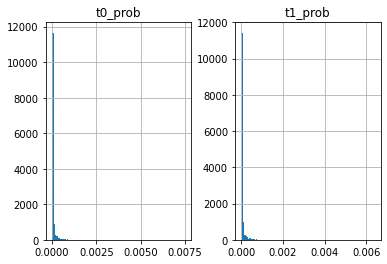

time: 505 ms


In [ ]:

# norm_max = df_word_count[['t0_prob', 't1_prob']].max().max()
# norm_min = df_word_count[['t0_prob', 't1_prob']].min().min()


# df_word_count['t1_prob'] = df_word_count.t1_prob.apply( lambda x: fn_hyperbolic_prob(x,norm_max, norm_min) )
# df_word_count['t0_prob'] = df_word_count.t0_prob.apply( lambda x: fn_hyperbolic_prob(x,norm_max, norm_min) )




df_word_count[['t0_prob', 't1_prob']].hist(bins=100)


In [ ]:
# df_word_count.sort_values(by='t0_prob' , ascending=False).head(n=10)

df_word_count.t1_prob.describe()

count    13456.000000
mean         0.000074
std          0.000165
min          0.000024
25%          0.000024
50%          0.000048
75%          0.000048
max          0.006362
Name: t1_prob, dtype: float64

time: 6.06 ms


In [ ]:

# Calculo la probabildia de cada clase ya que el set no esta balanceado t1/t0
global_t0_prob = sum(df_clean_train.target == 0)/len(df_clean_train)
global_t1_prob = sum(df_clean_train.target == 1)/len(df_clean_train)


# fuerzo a cero las probabilidades globales
global_t0_prob, global_t1_prob = 1,1


def get_word_prob(text):

#  text = clean_text(text)
  # Hago split del texto y lo vuelvo dataframe con la palabra como indice
  a = pd.DataFrame({ 'word': text.split() }).set_index('word')

  # Joineo con el DF de probabilidades de clase 1
  a = a.join( df_word_count)

  # Me quedo solo con las columnas de ocurrencias y probabilidad de t1
  a = a[['total' , 't0_prob' , 't1_prob']]
  


  # Guardo el numero de ocurrencias por si lo necesito despues, 
  # los NaN es porque no estaba en el training set y le pongo 0 ocurrencias
  # a.ocurrences.fillna(0 , inplace = True)
  # Si la palabra no esta en el set de entrenamiento 
  # hay igual probailidad de encontrarla en una clase u otra
  # pero le asigno probabilidad 1 para que no me afecta a la productoria luego
  # a.t1_prob.fillna(1 , inplace = True)

  # Como voy a hacer una productoria, borro los NA ya que no suman a la probabilidad
  # if debug: print(text , a[a.t1_prob.isnull()].index.to_list())
  a.dropna(inplace=True)
  
  return a

# Clasifico por productoria de probabilidades
def get_class_by_prod_prob(text):
  a = get_word_prob(text)


  t1_probability = global_t1_prob* a.t1_prob.prod()
  t0_probability = global_t0_prob* a.t0_prob.prod()


  if debug:
    print('t1-t0',t1_probability-t0_probability
          ,'\nt1_probability' , t1_probability
          ,'\nt0_probability' , t0_probability
          ,'\nprob_list:\n' , a.t1_prob
          ,'\nprob_list:\n' , a.t0_prob)
  
  
  if t1_probability == t0_probability: 
    if debug == 1 : print(t1_probability, t0_probability , text)
    return -1

  if t1_probability > t0_probability: return 1


  return 0


def get_class_by_sum_prob(text):
  a = get_word_prob(text)

  t1_probability = global_t1_prob* a.t1_prob.sum()
  t0_probability = global_t0_prob* a.t0_prob.sum()

  if debug:
    print('t1-t0',t1_probability-t0_probability
          ,'\nt1_probability' , t1_probability
          ,'\nt0_probability' , t0_probability
          ,'\nprob_list:\n' , a.t1_prob
          ,'\nprob_list:\n' , a.t0_prob)
  
  
  if t1_probability == t0_probability: 
    if debug == 1 : print(t1_probability, t0_probability , text)
    return -1

  if t1_probability > t0_probability: return 1


  return 0
  

# Clasifico por cantidad de palabras en una clase
def get_class_by_n_word(text):
  a = get_word_prob(text)

  if len(a) == 0 : return -1
  # Cuento cuantas palabras tiene mas probabilidad de clase 1 que de clase cero
  perc_word_in_class_t1 = sum( global_t1_prob * a.t1_prob > global_t0_prob * a.t0_prob )/len(a)
  
  # Igual cantidad de palabras en cada clase
  if perc_word_in_class_t1 == 0.5 : return -1

  if perc_word_in_class_t1 > 0.5: return 1

  return 0

def get_class_by_avg_prob(text):
  a = get_word_prob(text)

  prob_average_diff = global_t1_prob * a.t1_prob.mean() - global_t0_prob * a.t0_prob.mean()
  
  # Igual probabilidad de una clase que otra
  if prob_average_diff == 0 : return -1

  if prob_average_diff > 0: return 1

  return 0

def get_class_by_max_prob(text):
  a = get_word_prob(text)

  t1_prob = [ x*global_t1_prob for x in a.t1_prob.to_list()]
  t0_prob = [ x*global_t0_prob for x in a.t0_prob.to_list()]
  
  t1_prob.sort(reverse=True)
  t0_prob.sort(reverse=True)

  for x in range(0, len(t1_prob)):
    if  t1_prob[x] == t0_prob[x]: continue
    if  t1_prob[x]  > t0_prob[x]: return 1
    if  t1_prob[x]  < t0_prob[x]: return 0

  # Si llego hasta aca es que todos los casos las probabilidades fueron iguales
  return -1


debug =0

text_to_try="There's a construction guy working on the Disney store and he has huge gauges in his ears ?? ...that is a bloody accident waiting to happen"
text_to_try="@BubblyCuteOne ?????????? ok ok okayyyyyy Ima act right ....bout to get this blizzard tho"

text_to_try="hurricane hostage disaster fire you hostage killerkillerkillerkillerkiller killer killer murderer killer killer killer killerkiller killer"
text_to_try="@LoneWolffur control yourself tora"
text_to_try = clean_text(text_to_try)

print( get_class_by_prod_prob(text_to_try) )
print( get_class_by_sum_prob(text_to_try) )
print( get_class_by_avg_prob(text_to_try) )
print( get_class_by_max_prob(text_to_try) )
print( get_class_by_n_word(text_to_try) )


0
0
0
1
0
time: 30.6 ms


In [ ]:
df_clean_test['target_by_prod_prob'] = -1
df_clean_test['target_by_sum_prob'] = -1
df_clean_test['target_by_max_prob'] = -1
df_clean_test['target_by_avg_prob'] = -1
df_clean_test['target_by_n_word'] = -1





def fn_classify_text(new_df_text):
  new_df_text.target_by_prod_prob = new_df_text.text_clean.apply( lambda x: get_class_by_prod_prob(x) )
  new_df_text.target_by_sum_prob = new_df_text.text_clean.apply( lambda x: get_class_by_sum_prob(x) )
  new_df_text.target_by_max_prob = new_df_text.text_clean.apply( lambda x: get_class_by_max_prob(x) )
  new_df_text.target_by_avg_prob = new_df_text.text_clean.apply( lambda x: get_class_by_avg_prob(x) )
  new_df_text.target_by_n_word   = new_df_text.text_clean.apply( lambda x:  get_class_by_n_word(x) )
  
  
  return new_df_text


df_clean_test_split = np.array_split(df_clean_test, n_cores )
pool = Pool(n_cores)
df_clean_test = pd.concat(pool.map(fn_classify_text, df_clean_test_split))
pool.close()
pool.join()

# fn_classify_text( df_clean_test)

# get_percentage_t1('news' ,pd_str_value_counts )
debug = 0



time: 13 s


# Score


In [ ]:
print("Scores")
print("\n",df_clean_test.target_by_prod_prob.value_counts())
print("\n",df_clean_test.target_by_avg_prob.value_counts(),)
print("\n",df_clean_test.target_by_sum_prob.value_counts(),)
print("\n",df_clean_test.target_by_max_prob.value_counts(),)
print("\n",df_clean_test.target_by_n_word.value_counts(),)




Scores

 0    917
1    606
Name: target_by_prod_prob, dtype: int64

 0    883
1    640
Name: target_by_avg_prob, dtype: int64

 0    883
1    640
Name: target_by_sum_prob, dtype: int64

 0    914
1    609
Name: target_by_max_prob, dtype: int64

  0    919
 1    504
-1    100
Name: target_by_n_word, dtype: int64
time: 8.47 ms


In [ ]:
col_name_target = [col_name for col_name in df_clean_test.columns.to_list() if 'target_' in col_name]
df_clean_test[ col_name_target]

# df_clean_test['result'] = -1

# df_clean_test.apply

df_clean_test['n_zeros'] = (df_clean_test[col_name_target] == 0).sum(axis=1)
df_clean_test['n_ones']  = (df_clean_test[col_name_target] == 1).sum(axis=1)

# df_clean_test['result'] = (df_clean_test.n_ones >  df_clean_test.n_zeros )
# Pondero por la probabilidad de clase
df_clean_test['result'] = (global_t1_prob* df_clean_test.n_ones >  global_t0_prob * df_clean_test.n_zeros )
df_clean_test['result'] = df_clean_test['result'].astype('int')

# df_clean_test.loc[:,col_name_target] == 0
pd.set_option('display.max_rows', None)

# df_clean_test[ df_clean_test.result != df_clean_test.target]

time: 13.7 ms


In [ ]:
global_t0_prob,global_t1_prob

(1, 1)

time: 1.61 ms


In [ ]:
# col_name_target = [col_name for col_name in df_clean_test.columns.to_list() if 'target' in col_name] + ['result']
col_name_target = [col_name for col_name in df_clean_test.columns.to_list() if 'target' in col_name]

for x in col_name_target:
  df_clean_test[x] = df_clean_test[x].astype(int)

final_cols = [a for a in df_clean_test.head(n=10).columns.to_list() if (a.count('target_')  or a == 'id' ) ]


if 'target' in df_clean_test.columns.to_list():
 out_file_name = "MAXI_005_NAIVE_BAYES_LAPLACIAN_SMOOTHING_NORMAL_CLEAN_CROSS_VALIDATION.CSV"
 df_clean_test[final_cols].to_csv(out_file_name,header=True,index = False)
else:
  out_file_name = 'MAXI_005_NAIVE_BAYES_LAPLACIAN_SMOOTHING_NORMAL_CLEAN_TEST_RESULTS_col_result.CSV'
  df_clean_test[['id','result']].rename(columns={'result':'target'} , inplace=False).to_csv(out_file_name,header=True,index = False)
  out_file_name = 'MAXI_005_NAIVE_BAYES_LAPLACIAN_SMOOTHING_NORMAL_CLEAN_TEST_RESULTS_col_prod_prob.CSV'
  df_clean_test[['id','target_by_prod_prob']].rename(columns={'target_by_prod_prob':'target'}, inplace=False).to_csv(out_file_name,header=True,index = False)



# df_clean_test.rename(columns={'keyword':'asdf'}).head(n=10)



time: 15.6 ms


In [ ]:
col_name_target = [col_name for col_name in df_clean_test.columns.to_list() if 'target' in col_name] + ['result']

df_clean_test[col_name_target].describe()
# df_clean_test[col_name_target].hist()
# df_clean_test.columns

# col_name_target

,target,target_by_prod_prob,target_by_sum_prob,target_by_max_prob,target_by_avg_prob,target_by_n_word,result
count,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000
mean,0.418253,0.397899,0.420223,0.399869,0.420223,0.265266,0.410374
std,0.493434,0.489625,0.493757,0.490032,0.493757,0.571344,0.492063
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 27.4 ms


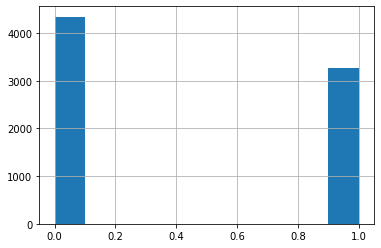

time: 152 ms


In [ ]:
train.target.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03c0aa2630>,
      dtype=object)

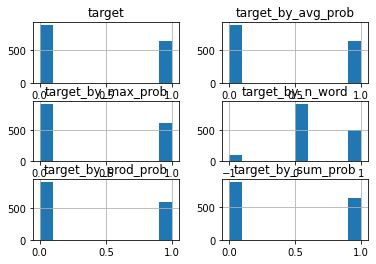

time: 539 ms


In [ ]:
df_clean_test[ [x for x in df_clean_test.columns if x.count('target')] ].hist()

In [ ]:
df_clean_test[(df_clean_test.target_by_avg_prob == -1)| 
(df_clean_test.target_by_max_prob == -1)| 
(df_clean_test.target_by_sum_prob == -1)| 
# (df_clean_test.target_by_n_word == -1)| 
(df_clean_test.target_by_prod_prob == -1)]

,id,keyword,location,text,target,text_clean,target_by_prod_prob,target_by_sum_prob,target_by_max_prob,target_by_avg_prob,target_by_n_word,n_zeros,n_ones,result


time: 9.13 ms


# F1 Score


In [ ]:
# df_clean_test.new_target = df_clean_test.target

def caluculate_score_f1(cmp_value , real, estimated):

  # Es cmp_value y estime cmp_value
  true_positive  =  sum(  (real == cmp_value) & (estimated == cmp_value)  )
  # No es cmp_value y estime cmp_value
  false_positive =  sum(  (real != cmp_value) & (estimated == cmp_value)  )

  # true_negative  = sum(  (real == 0) & (estimated == 0)  )
  # false_negative = sum(  (real == 1) & (estimated == 0)  )

  # no es cmp_value y estime distinto de cmp_value 
  true_negative  = sum(  (real != cmp_value ) & (estimated !=cmp_value)  )
  # es cmp_value pero estime otra cosa 
  false_negative = sum(  (real == cmp_value) & (estimated != cmp_value)  )

  if true_positive == 0: return 0
  

  score_precision = true_positive/ ( true_positive + false_positive)
  score_recall    = true_positive/ ( true_positive + false_negative)

  return 2*score_precision*score_recall/(score_precision+score_recall)

if 'target' in df_clean_test.columns.to_list():
  print(  "target_by_prod_prob:" ,caluculate_score_f1(1, df_clean_test.target , df_clean_test.target_by_prod_prob)
        ,"\ntarget_by_n_word:"  ,caluculate_score_f1(1, df_clean_test.target , df_clean_test.target_by_n_word)
        ,"\ntarget_by_avg_prob:",caluculate_score_f1(1, df_clean_test.target , df_clean_test.target_by_avg_prob)
        ,"\ntarget_by_sum_prob:",caluculate_score_f1(1, df_clean_test.target , df_clean_test.target_by_sum_prob)
        ,"\ntarget_by_max_prob:",caluculate_score_f1(1, df_clean_test.target , df_clean_test.target_by_max_prob)
        ,"\nresult:"            ,caluculate_score_f1(1, df_clean_test.target , df_clean_test.result)
    )


target_by_prod_prob: 0.753016894609815 
target_by_n_word: 0.6993865030674847 
target_by_avg_prob: 0.7220046985121379 
target_by_sum_prob: 0.7220046985121379 
target_by_max_prob: 0.6292134831460674 
result: 0.7210776545166403
time: 24.3 ms


In [ ]:
#Busco Criterio de decision para cuando hay igual cantidad de unos que ceros


if 'target' in df_clean_test.columns.to_list():
  a = df_clean_test[ df_clean_test.n_zeros == df_clean_test.n_ones ]

  # print(len(a))
  # print(a.target_by_avg_prob)


  print( 
    "scores",
    "\ntarget_by_prod_prob:" ,caluculate_score_f1(1, a.target , a.target_by_prod_prob),
    "\ntarget_by_n_word:"    ,caluculate_score_f1(1, a.target , a.target_by_n_word),
    "\ntarget_by_avg_prob:"  ,caluculate_score_f1(1, a.target , a.target_by_avg_prob),
    "\ntarget_by_sum_prob:"  ,caluculate_score_f1(1, a.target , a.target_by_sum_prob),
    "\ntarget_by_max_prob:"  ,caluculate_score_f1(1, a.target , a.target_by_max_prob),
    "\nresult:"              ,caluculate_score_f1(1, a.target , a.result)
  )
  print(a)


scores 
target_by_prod_prob: 0 
target_by_n_word: 0 
target_by_avg_prob: 1.0 
target_by_sum_prob: 1.0 
target_by_max_prob: 0 
result: 0
        id    keyword                        location  \
5790  8261    rioting  A little house in the outback.   
6230  8893  snowstorm                    Wakefield MA   

                                                   text  target  \
5790  `bbcnews The Ass. of British Insurers says rio...       1   
6230  Manuel hoping for an early Buffalo snowstorm s...       1   

                                             text_clean  target_by_prod_prob  \
5790  bbcnews the ass british insurers say rioting c...                    0   
6230  manuel hoping early buffalo snowstorm accuracy...                    0   

      target_by_sum_prob  target_by_max_prob  target_by_avg_prob  \
5790                   1                   0                   1   
6230                   1                   0                   1   

      target_by_n_word  n_zeros  n_ones  res

In [ ]:
# pd.set_option('display.max_colwidth', None)


if 'target' in df_clean_test.columns.to_list():
  print('cross validation')
  print(df_clean_test[ df_clean_test.target != df_clean_test.result ].head(n=10).to_string())
  # df_clean_test[ df_clean_test.target != df_clean_test.result ].head(n=10)
  # df_clean_test[ df_clean_test.target != df_clean_test.result ].set_option()
else:
  print('asdf')


# df_clean_test[ df_clean_test.target != df_clean_test.result ]

cross validation
      id              keyword              location                                               text  target                                         text_clean  target_by_prod_prob  target_by_sum_prob  target_by_max_prob  target_by_avg_prob  target_by_n_word  n_zeros  n_ones  result
12    18                  NaN                   NaN  #raining #flooding #Florida #TampaBay #Tampa 1...       1  raining flooding florida tampa bay tampa day v...                    0                   0                   0                   0                -1        4       0       0
31    48               ablaze            Birmingham  @bbcmtd Wholesale Markets ablaze http://t.co/l...       1                    bbcmtd wholesale markets ablaze                    0                   0                   0                   0                 0        5       0       0
51    74               ablaze                 India  Man wife get six years jail for setting ablaze...       1    man wife ge

In [ ]:
# Saving the csv


# df_clean_test.rename(columns={'target_by_prod_prob':'target'})[['id','target']].to_csv('003_BAYES_PROD_PROB_NO_STOP_WORDS_LEMATIZATION.csv',header=True,index = False)


# final_cols = [a for a in df_clean_test.head(n=10).columns.to_list() if (a.count('target')  or a == 'id' ) ]


# df_clean_test[final_cols].head(n=10)


time: 2.27 ms


In [ ]:
final_cols

['id',
 'target_by_prod_prob',
 'target_by_sum_prob',
 'target_by_max_prob',
 'target_by_avg_prob',
 'target_by_n_word']

time: 3.23 ms


# Extra test